<a href="https://colab.research.google.com/github/Severus-Reddy/Personality-Classification-using-MBTI/blob/main/Dataset_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Pre-processing

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')

import pandas as pd
import pickle
import os.path
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as graph
import spacy
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
drive.mount('/content/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
#reading data file
data=pd.read_csv('/content/gdrive/MyDrive/mbti_1.csv')

#Description about data
print("Dataset Description: \n", data.describe())
print("\n")
#Info about data
print("Datset Info: \n", data.info())
print("\n")

#Shape data
print("Dimensions of Dataset: ",data.shape)
print("\n\n")

Dataset Description: 
         type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
Datset Info: 
 None


Dimensions of Dataset:  (8675, 2)





Null Values: 

type     0
posts    0
dtype: int64


No of posts for each mbti Personality: 

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)




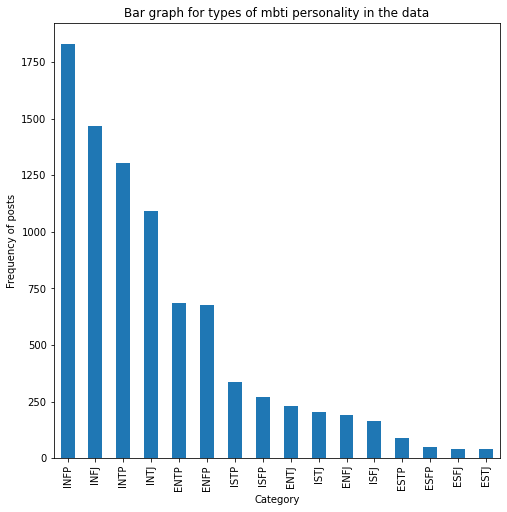

In [25]:
#Check for null values
print("Null Values: \n")
print(data.isnull().sum())

#Plotting frequency of different categories
countCategory=data.type.value_counts()
print('\n')

print("No of posts for each mbti Personality: \n")
print(countCategory)

#Frequency vs label graphs
#Bar Graph
print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of mbti personality in the data'))
print("\n")
#pie graph
graph.pie(data,names='type',title='Pie graph for types of mbti personality in the data', height=600, width=600)

In [26]:
#Helper function to create a list for type indicators 
def helper(ls, ch1, Type, ind):
  i=0
  for row in Type:
    if row[ind]==ch1:
      ls[i]=1
    else :
      ls[i]=0
    i= i+1
  return ls

'''This function takes dataset as input 
   It adds 4 columns(dimnesions) for 4 type indicators(personality traits)'''
#function to add columns for 4 type indicators
def Add_Type_Indicators(data):
  IE = np.zeros(data.shape[0])
  NS = np.zeros(data.shape[0])
  TF = np.zeros(data.shape[0])
  JP = np.zeros(data.shape[0])

  Type= list(data["type"])

  IE= helper(IE, 'I', Type, 0)
  NS= helper(NS, 'N', Type, 1)
  TF= helper(TF, 'T', Type, 2)
  JP= helper(JP, 'J', Type, 3)
  

  data.insert(2, "IE", IE, True)
  data.insert(3, "NS", NS, True)
  data.insert(4, "TF", TF, True)
  data.insert(5, "JP", JP, True)

data_copy=data.copy(deep=True)
Add_Type_Indicators(data_copy)


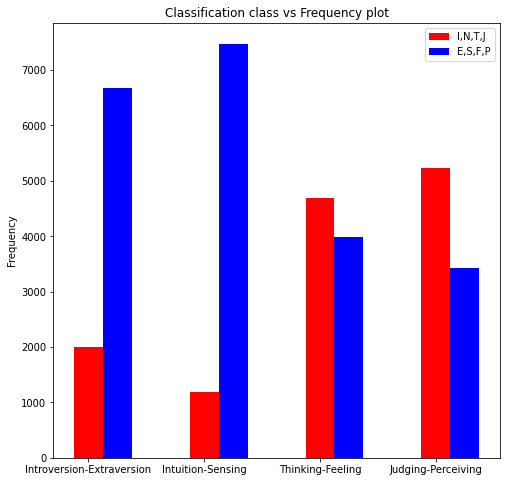

In [27]:
# Plotting Classification class vs Frequency plot for IE, NS, TF, JP

I,N,T,J=data_copy['IE'].value_counts()[0],data_copy['NS'].value_counts()[0],data_copy['TF'].value_counts()[0],data_copy['JP'].value_counts()[0]
E,S,F,P=data_copy['IE'].value_counts()[1],data_copy['NS'].value_counts()[1],data_copy['TF'].value_counts()[1],data_copy['JP'].value_counts()[1]

plt.figure(figsize=(8,8))

coordinates=np.array(range(0,4))*2
plt.bar(coordinates-0.25,(I,N,T,J),0.5,label="I,N,T,J",color='red',tick_label=['Introversion-Extraversion','Intuition-Sensing','Thinking-Feeling','Judging-Perceiving'])
plt.bar(coordinates+0.25,(E,S,F,P),0.5,label="E,S,F,P",color='blue')

plt.legend()
plt.title('Classification class vs Frequency plot')
plt.ylabel('Frequency')
plt.show()

In [28]:
data_copy_1=data_copy.copy(deep=True)

In [29]:
data_copy=data_copy_1.copy(deep=True)
#Pre-Processing

#converting all text/posts to lower case
data_copy["posts"] = data_copy["posts"].str.lower()

'''This function takes a list of texual data as input.
   It performs pre-processing and natural language processing on the data.
   It returns the processed textual data list as output.'''

#remove url links
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)
  
  pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
  post_temp=data_copy._get_value(i, 'posts')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing special characters and numbers from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\W+')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[0-9]')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing extra spaces from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\s+')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts', post_temp)

#remove stop words
remove_words = stopwords.words("english")
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
  data_copy._set_value(i, 'posts', post_temp)

#remove mbti personality words from text
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
  data_copy._set_value(i, 'posts', post_temp)

#Lemmatization (grouping similar words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
  data_copy._set_value(i, 'posts', post_temp)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
#data before preprocessing 
print("Data (post 2) before preprocessing :", data.iloc[2,1], "\n")
#data after preprocessing
print("Data (post 2) after preprocessing :", data_copy.iloc[2,1], "\n")

Data (post 2) before preprocessing : 'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven'